![Title](Images/cisco.png)

# Потехина Вера - Фт-370008

# Лабораторная работа - Корреляционный анализ в Python вариант - F


### Цели

<b>
* Часть 1: Набор данных
* Часть 2: Диаграммы рассеяния и корреляционные переменные
* Часть 3: Расчёт корреляции с Python
* Часть 4: Визуализация
</b>

### История / Cценарий

Корреляция является важной статистической зависимостью, которая может указывать, связаны ли линейные значения переменных.

В этой лабораторной работе вы узнаете, как использовать Python для расчета корреляции. В Части 1 Вы подготовите набор данных. В Части 2 Вы узнаете, как определить, являются ли переменные в данном наборе данных взаимозависимыми. Наконец, в Части 3, Вы будете использовать Python для вычисления корреляции между двумя наборами переменных.

### Необходимые ресурсы
* 1 ПК с доступом в Интернет
* Raspberry Pi версии 2 или выше
* Библиотеки Python: pandas, numpy, matplotlib, seaborn
* Файл данных: brainsize.txt

## Часть 1: Набор данных

Вы будете использовать набор данных, который содержит выборку 40 студентов правшей с вводного курса по Психологии из университета Southwestern. Испытуемые прошли четыре субтеста (Vocabulary, Similarities, Block Design, и Picture Completion) для расчёта шкалы интеллекта взрослых по Векслеру. Исследователи использовали магнитно-резонансную томографию (МРТ) для определения размера мозга у субъектов. Также включены сведения о гендерных показателях и размере тела (рост и вес). Исследователи скрыли вес двух испытуемых и высоту одного из них по причинам конфиденциальности.
Для набора данных были применены две простые модификации:

1. Заменены вопросительные знаки, используемые для представления скрытых данных, описанных выше, строкой «NaN». Замена была выполнена, потому что Pandas не обрабатывает вопросительные знаки правильно.

2. Заменены все символы табуляции запятыми, преобразуя набор данных в набор данных CSV.

Готовый набор данных сохранён как `brainsize.txt`.

#### Шаг 1: Загрузка набора данных из файла.

До того, как набор данных можно использовать, он должен быть загружен в память.

В приведенном ниже коде первая строка импортирует модули `pandas` и определяет `pd` как дескриптор, который ссылается на один из модулей.

Вторая строка загружает CSV-файл набора данных в переменную с именем `brainFile`.

Третья строка использует метод `read_csv()` из библиотеки `pandas`, чтобы преобразовать набор данных CSV, хранящийся в `brainFile` в кадр данных. Затем кадр данных хранится в переменной `brainFrame`.

Запустите ячейку ниже, чтобы выполнить описанные функции.

In [16]:
# Ячейка для кода № 1
import pandas as pd
brainFile = 'brainsize.txt'
brainFrame = pd.read_csv(brainFile)

#### Шаг 2. Проверка кадра данных.

Чтобы убедиться, что кадр данных правильно загружен и создан, используйте метод `head()`. Метод `head()` отображает первые пять записей в кадре данных.

In [17]:
# Ячейка для кода № 2
brainFrame.head(5)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


## Часть 2: Диаграммы рассеяния и корреляционные переменные

#### Шаг 1: метод `describe()` в библиотеке pandas.
Библиотека pandas включает в себя метод `describe()`, который выполняет одни и те же общие вычисления на предложенном наборе данных. Помимо базовых операций таких, как подсчёт, расчёт среднего значения, расчёт среднеквадратического отклонения, расчёт минимума, и максимума,  `describe()` также отличный способ быстро проверить достоверность значений в кадре данных.<p>
Запустите ячейку ниже, чтобы вывести результаты, полученные с помощью функции `describe()` при использовании её на кадре данных `brainFrame`.

In [18]:
# Ячейка для кода № 3
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


#### Шаг 2: Диаграммы рассеяния

Диаграммы рассеяния важны при работе с корреляциями, поскольку они позволяют быстро визуально проверить природу связи между переменными. В этой лабораторной работе используется коэффициент корреляции Пирсона, который чувствителен только к линейной зависимости между двумя переменными. Также существуют другие более надежные методы корреляции, но они выходят за рамки этой лабораторной работы.

##### a. Загрузите необходимые модули.
Прежде чем строить графики, необходимо импортировать несколько модулей, а именно `numpy` и `matplotlib`. Запустите ячейку ниже, чтобы загрузить эти модули.

In [4]:
# Ячейка для кода № 4
import numpy
import matplotlib.pyplot as plt

##### b. Разделите данные.
Чтобы гарантировать, что результаты не будут искажены из-за различий в мужских и женских телах, кадр данных разбит на два: один содержит все мужские записи, а другой - только женские экземпляры. <p>
Запуск ячейки ниже создает два новых кадра данных: menDf и womenDf, каждый из которых содержит соответствующие записи.

In [19]:
# Ячейка для кода № 5
## Ячейка для кода № 7
#SF['Month'] = SF['Date'].apply(lambda month : int(month[0:2]))
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]
menDf.head(5)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
8,Male,89,93,84,134.0,66.3,904858
9,Male,133,114,147,172.0,68.8,955466


##### c. Постройте графики.
Поскольку набор данных включает в себя три различных измерения интеллекта (PIQ, FSIQ и VIQ), первая строка ниже использует метод `mean()` из библиотеки Pandas для вычисления среднего значения между тремя измерениями и сохранения результата в переменной `menMeanSmarts`. Обратите внимание, что первая строка относится к menDf, отфильтрованному кадру данных, содержащему только мужские записи.<p>
Вторая строка использует метод `scatter()` библиотеки `matplotlib` для создания графика диаграммы рассеяния между переменной `menMeanSmarts` и атрибутом `MRI_Count`. MRI_Count в этом наборе данных можно рассматривать как меру физического размера мозга испытуемых.<p>
Третья строка просто отображает график.<p>
Четвертая строка используется для гарантированного отображения графика в этом блокноте.

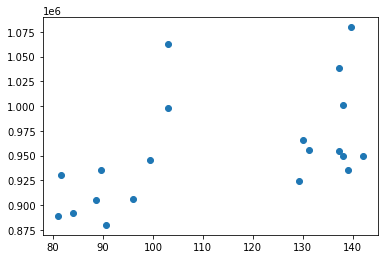

In [22]:
# Ячейка для кода № 6
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis = 1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])

plt.show()
%matplotlib inline

Аналогичным образом, приведенный ниже код создает график диаграммы рассеяния для кадра данных, содержащему только женские записи.

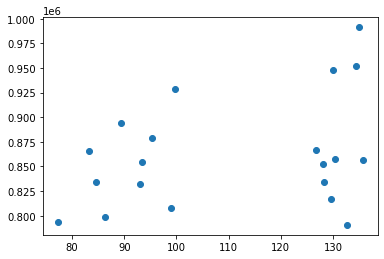

In [23]:
# Ячейка для кода № 7
# Постройка графика диаграммы рассеяния для кадра данных с женскими записями
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis = 1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])

plt.show()
%matplotlib inline

## Часть 3: Вычисление корреляции с Python


#### Шаг 1: Рассчитайте корреляцию для brainFrame.
Метод `corr()` библиотеки pandas обеспечивает простой способ вычисления корреляции для кадра данных. Просто применяя метод на кадре данных, можно получить корреляцию между всеми переменными одновременно.

In [25]:
# Ячейка для кода № 8
brainFrame.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Обратите внимание на диагональ слева направо в таблице корреляции, сгенерированной выше. Почему диагональ заполнена значениями 1s? Это совпадение? Объясните.

Ответ: корреляция определяет взаимосвязь величин. Взаимосвязь величины с самой собой максимально, поэтому на диагонали единицы.

Продолжая смотреть на таблицу корреляции выше, обратите внимание, что значения зеркалируются; значения под диагональю имеют зеркальный аналог над ней. Это совпадение? Объясните.

Ответ: величина А связана с величиной В точно так же, как величина В связана с величиной А. Это одна и та же связь, поэтому значение не может быть разным.

Используя тот же метод `corr()`, легко вычислить корреляцию переменных, содержащихся в кадре с женскими записями:

In [26]:
# Ячейка для кода № 9
womenDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


И то же самое можно сделать для переменных, содержащихся в кадре с мужскими записями:

In [27]:
# Ячейка для кода № 10
# Используйте corr() для расчёта критерия корреляции Пирсона для кадра данных с мужчинами
menDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


## Часть 4: Визуализация

#### Шаг 1: Установите Seaborn.
Чтобы упростить визуализацию корреляций данных, можно использовать тепловую карту. На основе цветных квадратов тепловая карта может помочь выявить корреляции с первого взгляда.

Модуль Python с именем `seaborn` очень упрощает построение тепловых карт.

Сначала запустите ячейку ниже, чтобы загрузить и установить модуль `seaborn`.

In [29]:
# Ячейка для кода № 11
!pip install seaborn

  Using cached https://files.pythonhosted.org/packages/61/51/046cbc61c7607e5ecead6ff1a9453fba5e7e47a5ea8d608cc7036586a5ef/scipy-1.4.1-cp37-cp37m-win_amd64.whl


#### Шаг 2: Нарисуйте корреляционную тепловую карту.

Теперь, когда кадры данных готовы, можно отобразить тепловые карты. Далее приведен анализ кода из ячейки ниже:

Строка 1: Создает таблицу корреляции, основанную на фрейме данных `womenNoGenderDf` и хранит его в `wcorr`.<br>
Строка 2: Использует метод `heatmap()` библиотеки `seaborn` для генерации и построения тепловой карты. Обратите внимание, что `heatmap()` принимает `wcorr`, как параметр.<br>
Строка 3: используется для экспорта и сохранения созданной тепловой карты в виде PNG-изображения. Хотя строка 3 не активна (перед ней стоит символ `#`, заставляя интерпретатор игнорировать ее), она сохранена в информационных целях.

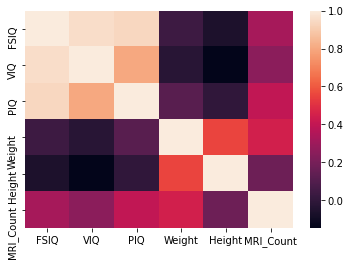

In [30]:
# Ячейка для кода № 12
import seaborn as sns

wcorr = womenDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Аналогичным образом, приведенный ниже код создает и отображает тепловую карту для кадра данных с мужчинами.

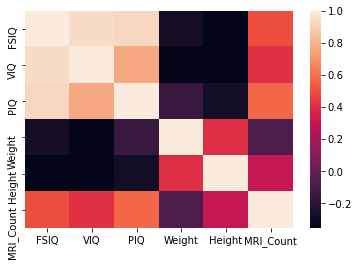

In [31]:
# Ячейка для кода № 14
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

У многих пар переменных корреляция близка к нулю. Что это значит?

Ответ: это значит, что эти пары практически не взаимосвязаны и изменение одного значения не повлияет на изменение другого.

Зачем делать разделение по полу?

Ответ: у женщин и мужчин вместе будет наибольший разброс по росту и весу, что может затруднить поиск зависимостей. Анализ мужчин и женщин по отдельности предполагает более точное выявление зависимостей или доказательство их отсутствия. 

Какие переменные имеют более сильную корреляцию с размером мозга (MRI_Count)? Это ожидалось? Объясните.

Ответ: корреляция наиболее велика у переменных тестов IQ и наименее велика у переменных роста и веса. Наибольшая корреляция наблюдается с тестом на дополнение картинки. Это ожидаемый результат, поскольку на интеллект не влияет размер тела. 
VIQ - Vocabulary - запас слов
FSIQ - Similarities - сходство
PIQ - Picture Completion - дополнить картинку

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>